## CV GROUP TASK - Boundary Tracing

**Group members:**
- Ahmed Hesham AbdElEllah Mohamed AboAli
- Hussien Mohamed Saad ElRashidy
- AbdElRahman Muhsen AbdElLatif AbdElGhany
- Mariam Magued Habib Bebawy
- Youssef Ahmed MahmoudElSayed Shawki

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Inner boundary tracing algorithm

In [3]:
def Boundary_Tracing(im):
    dir=3
    i = j = 0   # indices of first boundary pixel
    output = np.zeros(np.shape(im))
    rows,cols = np.shape(im)

    for n in range (0,rows-1,1):
        for m in range (0,cols-1,1):
            if (im[n,m]):
                i=n
                j=m
                break   
        if (im[n,m]):
            break
       
    print(i,j)

    somelist=[]   # list of boundary indices
    while(True):
        if(len(somelist)>4):
            if(somelist[1]==somelist[-1] and somelist[0]==somelist[len(somelist)-2]):
                return output
        if(im[i,j]):
            dir=(dir+3)%4
            output[i,j]=1
            somelist.append([i,j])
        else:
            if(dir==0):
                j=j-1
            elif(dir==1):
                i=i+1
            elif(dir==2):
                j=j+1
            else:
                i=i-1
            dir=dir+1
            if dir>3:
                dir=0

        if(dir==0):
            j=j+1
        elif(dir==1):
            i=i-1
        elif(dir==2):
            j=j-1
        else:
            i=i+1

### Image with one region

In [4]:
# CREATING IMAGE
height = width = 200
blank_image = np.zeros((height,width))
image = cv2.rectangle(blank_image, (30, 30), (100, 100), 1, -1)
image = cv2.rectangle(blank_image, (125, 125), (175, 175), 1, -1)
image = cv2.rectangle(blank_image, (85, 85), (155, 155), 1, -1)

# PERFORMING BOUNDARY TRACING
boundary = Boundary_Tracing(image)

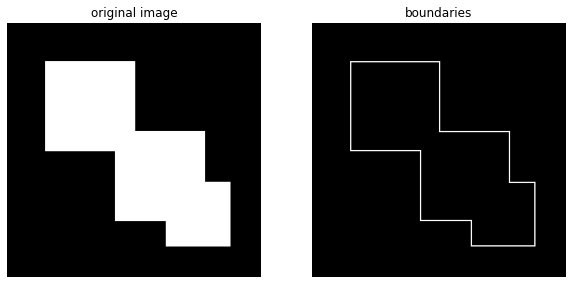

In [6]:
# PLOTTING ORIGINAL // BOUNDARIES
fig = plt.figure(figsize=(10,10))
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.axis('off'), plt.title('original image')
plt.subplot(122), plt.imshow(boundary, cmap='gray'), plt.axis('off'), plt.title('boundaries')
plt.show()

### Image with two regions

In [7]:
# CREATING IMAGE
height = width = 200
blank_image = np.zeros((height,width))
image = cv2.rectangle(blank_image, (30, 30), (100, 100), 1, -1)
image = cv2.rectangle(blank_image, (125, 125), (175, 175), 1, -1)

# PERFORMING BOUNDARY TRACING
boundary1 = Boundary_Tracing(image)

# REVERSING THE IMAGE
flip1 = cv2.flip(image, 0)
trans = cv2.transpose(flip1)
flip2 = cv2.flip(trans, 0)

# PERFORMING BOUNDARY TRACING ON REVERSED IMAGE
boundary2 = Boundary_Tracing(flip2)

# REVERSING BOUNDARY IMAGE
flip1 = cv2.flip(boundary2, 0)
trans = cv2.transpose(flip1)
flip2 = cv2.flip(trans, 0)
boundary2 = flip2

# SUMMING BOUNDARIES
sum = boundary2 + boundary1

30 30


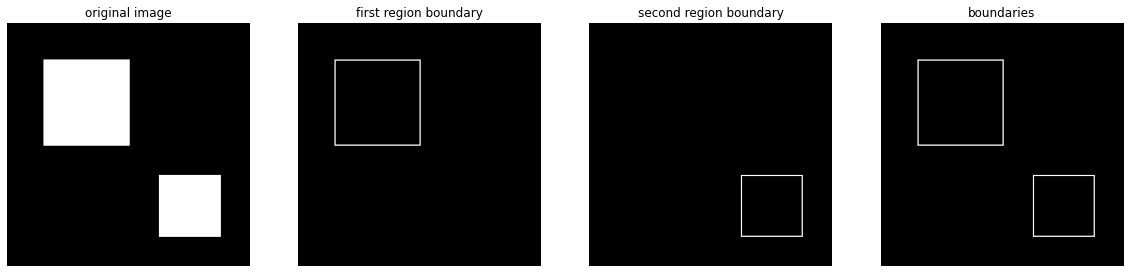

In [11]:
# PLOTTING ORIGINAL // FIRST BOUNDARY // SECOND BOUNDARY // BOUNDARIES
fig = plt.figure(figsize=(20,20))
plt.subplot(141), plt.imshow(image, cmap='gray'), plt.axis('off'), plt.title('original image')
plt.subplot(142), plt.imshow(boundary1, cmap='gray'), plt.axis('off'), plt.title('first region boundary')
plt.subplot(143), plt.imshow(boundary2, cmap='gray'), plt.axis('off'), plt.title('second region boundary')
plt.subplot(144), plt.imshow(sum, cmap='gray'), plt.axis('off'), plt.title('boundaries')
plt.show()